In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [26]:
data = pd.read_csv("Invoice Transmart Veege Fresh .csv")
print("Data Frame shape : " , data.shape)
data.head()

Data Frame shape :  (1006, 9)


,Transaction,Toko,date_time,Item,Harga / Unit,Quantity,Total Biaya,weekday_weekend,period_day
0,1,Solo Paragon,29-04-2023 14:34,GUAVA,6626.51,10,66265.1,weekend,Afternoon
1,1,Solo Paragon,29-04-2023 14:34,GUAVA,12048.20,30,361446.0,weekend,Afternoon
2,1,Solo Paragon,29-04-2023 14:34,LOCAL RED DRAGON,22289.16,50,1114458.0,weekend,Afternoon
3,1,Solo Paragon,29-04-2023 14:34,SEMANGKA MERAH,12048.20,200,2409640.0,weekend,Afternoon
4,1,Solo Paragon,29-04-2023 14:34,CALIFORNIAN PAPAYA,7228.92,70,506024.4,weekend,Afternoon


In [27]:
data['date_time'] = pd.to_datetime(data['date_time'] , format= "%d-%m-%Y %H:%M" )

In [28]:
data['date_time'].dtype

dtype('<M8[ns]')

In [29]:
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.weekday
data['hour'] = data['date_time'].dt.hour

In [30]:
data.head()

,Transaction,Toko,date_time,Item,Harga / Unit,Quantity,Total Biaya,weekday_weekend,period_day,month,day,hour
0,1,Solo Paragon,2023-04-29 14:34:00,GUAVA,6626.51,10,66265.1,weekend,Afternoon,4,5,14
1,1,Solo Paragon,2023-04-29 14:34:00,GUAVA,12048.20,30,361446.0,weekend,Afternoon,4,5,14
2,1,Solo Paragon,2023-04-29 14:34:00,LOCAL RED DRAGON,22289.16,50,1114458.0,weekend,Afternoon,4,5,14
3,1,Solo Paragon,2023-04-29 14:34:00,SEMANGKA MERAH,12048.20,200,2409640.0,weekend,Afternoon,4,5,14
4,1,Solo Paragon,2023-04-29 14:34:00,CALIFORNIAN PAPAYA,7228.92,70,506024.4,weekend,Afternoon,4,5,14


Text(0.5, 1.0, '10 Sayur paling laris')

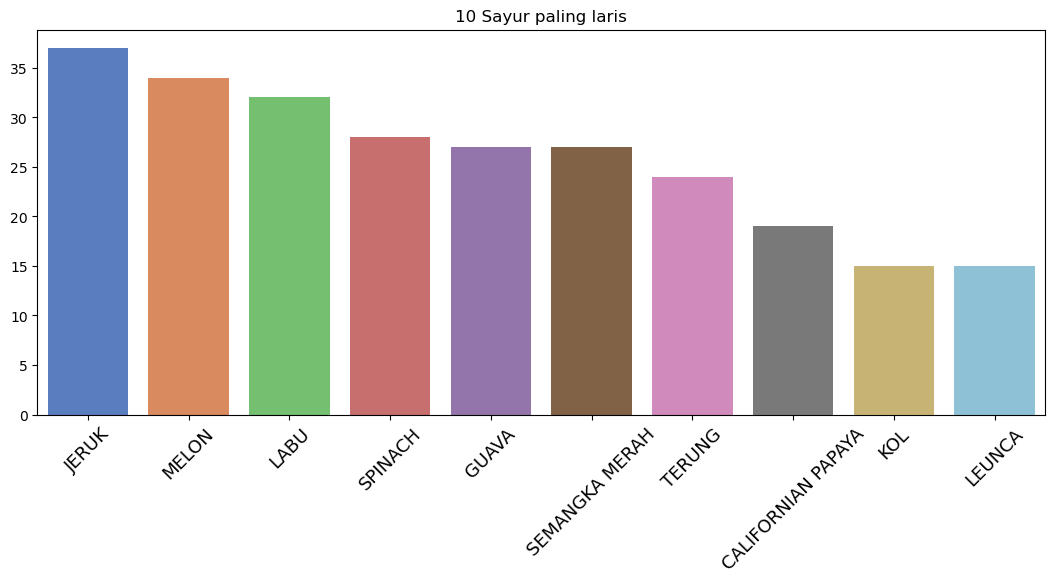

In [31]:
plt.figure(figsize=(13,5))
sns.set_palette('muted')

sns.barplot(x = data["Item"].value_counts()[:10].index,
               y = data["Item"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size=13 , rotation = 45)
plt.title("10 Sayur paling laris")

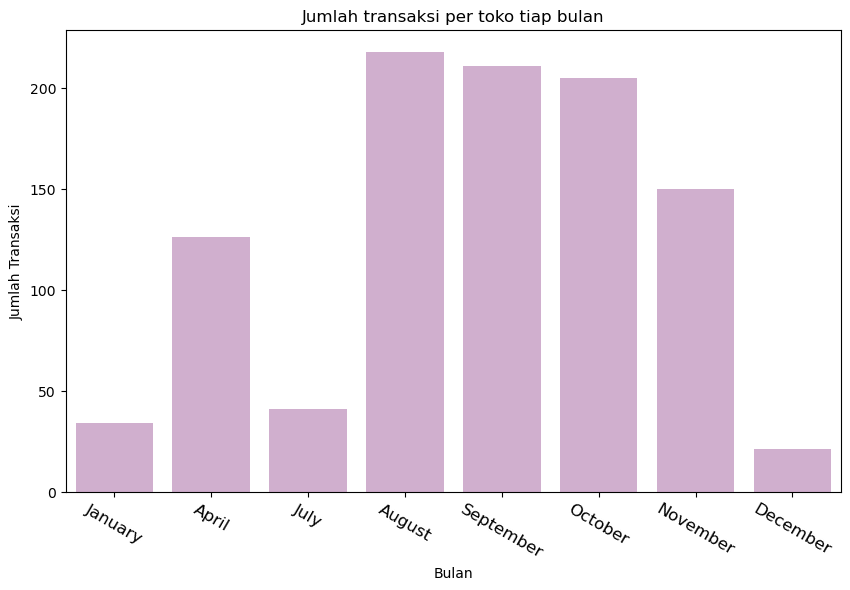

In [32]:
# transaksi tiap bulan
import calendar 
data_perbulan = data.groupby('month')['Transaction'].count()
plt.figure(figsize=(10, 6))
sns.barplot(
    x= [calendar.month_name[i] for i in data_perbulan.index],
    y=data_perbulan.values,
    color="#D5AAD3"
)
plt.xticks(rotation= -30 , size = 12)
plt.title("Jumlah transaksi per toko tiap bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")
plt.show()

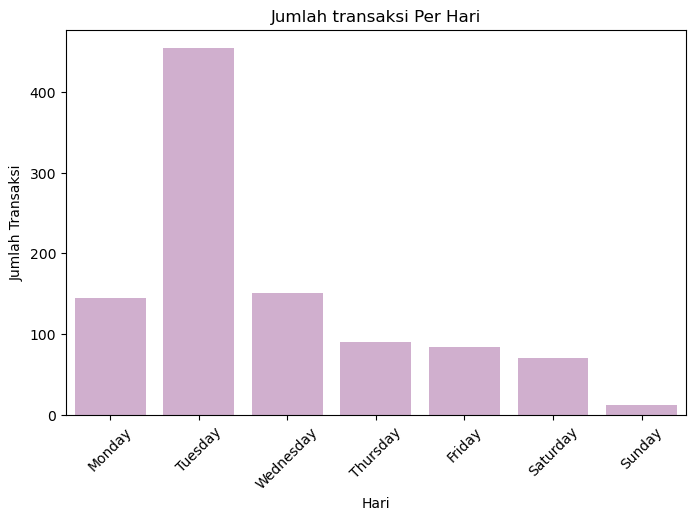

In [33]:
import calendar 
data_perday = data.groupby('day')['Transaction'].count()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=[calendar.day_name[i] for i in data_perday.index],
    y=data_perday.values ,
    color="#D5AAD3"
)
plt.xticks(rotation=45)
plt.title("Jumlah transaksi Per Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Transaksi")

plt.show()

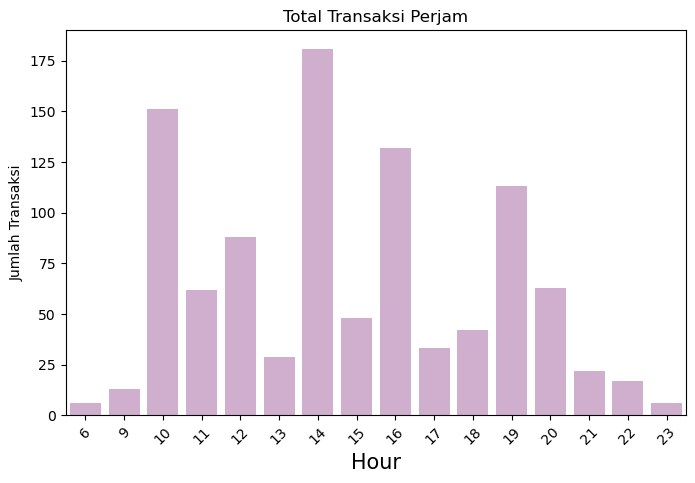

In [34]:
# pembelian tiap jam
data_perhour = data.groupby('hour')['Transaction'].count()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=data_perhour.index ,
    y=data_perhour.values ,
    color="#D5AAD3"
)
plt.xticks(rotation=45)
plt.title("Total Transaksi Perjam")
plt.xlabel("Hour" , size = 15)
plt.ylabel("Jumlah Transaksi")

plt.show()

## Data Preparation

In [35]:
data["Item"] = data["Item"].apply(lambda item: item.lower())

In [36]:
data["Item"] = data["Item"].apply(lambda item: item.strip())

In [37]:
data = data[["Transaction" , "Item"]].copy()
data.head(10)

,Transaction,Item
0,1,guava
1,1,guava
2,1,local red dragon
3,1,semangka merah
4,1,californian papaya
5,2,jeruk
6,2,guava
7,2,guava
8,2,local red dragon
9,2,semangka merah


In [38]:
from mlxtend.frequent_patterns import association_rules , apriori

In [39]:
item_count = data.groupby(["Transaction" , "Item"])["Item"].count().reset_index(name="Count")
item_count.head(10)

,Transaction,Item,Count
0,1,californian papaya,1
1,1,guava,2
2,1,local red dragon,1
3,1,semangka merah,1
4,2,californian papaya,1
5,2,guava,2
6,2,jeruk,1
7,2,local red dragon,1
8,2,semangka merah,1
9,3,californian papaya,1


In [40]:
item_count_pivot = item_count.pivot_table(index="Transaction" ,columns="Item" , values='Count' , aggfunc='sum').fillna(0)
print("Ukuran Dataset : " , item_count_pivot.shape)
item_count_pivot.head()

Ukuran Dataset :  (180, 158)


Item,aloe vera,alpukat mentega,apel malang curah 7/9,asparagus green,baby bean organic,bayam,bayam merah,bayam merah organik,beetroot,blewah,...,toge,tomat,tomat cherry,unskin petai,water spinach by pcs,water spinach organic,wortel,wortel lokal,wortel mini,zuccini
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
item_count_pivot = item_count_pivot.astype("int32")
item_count_pivot.head()

Item,aloe vera,alpukat mentega,apel malang curah 7/9,asparagus green,baby bean organic,bayam,bayam merah,bayam merah organik,beetroot,blewah,...,toge,tomat,tomat cherry,unskin petai,water spinach by pcs,water spinach organic,wortel,wortel lokal,wortel mini,zuccini
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

basket_encode = item_count_pivot.applymap(hot_encode)
basket_sayur = basket_encode

basket_sayur.head()

Item,aloe vera,alpukat mentega,apel malang curah 7/9,asparagus green,baby bean organic,bayam,bayam merah,bayam merah organik,beetroot,blewah,...,toge,tomat,tomat cherry,unskin petai,water spinach by pcs,water spinach organic,wortel,wortel lokal,wortel mini,zuccini
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
print("Ukuran Dataset : " , basket_sayur.shape)
print("Jumlah Transaksi : " , basket_sayur.shape[0])
print("Jumlah Barang : " , basket_sayur.shape[1])

Ukuran Dataset :  (180, 158)
Jumlah Transaksi :  180
Jumlah Barang :  158


In [44]:
support = 0.01
frequent_itemsets = apriori(basket_sayur , min_support = support , use_colnames=True)
frequent_itemsets.sort_values("support" , ascending=False ).head(10)

c:\Users\USER\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
58,0.183333,(jeruk)
68,0.155556,(labu)
116,0.127778,(semangka merah)
21,0.100000,(californian papaya)
50,0.100000,(guava)
86,0.100000,(melon)
520,0.088889,"(melon, semangka merah)"
74,0.083333,(leunca)
119,0.083333,(spinach)
123,0.077778,(terung)


In [45]:
metric = "lift"
rules = association_rules(frequent_itemsets , metric=metric , min_threshold=1)[["antecedents" , "consequents" , "support" , "confidence" , "lift"]]
rules.sort_values('confidence',ascending=False,inplace=True)
rules.head(15)

,antecedents,consequents,support,confidence,lift
3933,"(water spinach by pcs, daun kemangi)","(pakchoy, green spinach by pcs)",0.011111,1.0,36.000000
3947,"(daun kucai, lettuce)","(peterseli, pakchoy mini)",0.011111,1.0,36.000000
3775,"(peterseli, cuciwis, pakchoy mini)",(daun kucai),0.016667,1.0,20.000000
1594,"(californian papaya, local red dragon)",(semangka merah),0.033333,1.0,7.826087
3778,"(peterseli, cuciwis)","(daun kucai, pakchoy mini)",0.016667,1.0,25.714286
1586,"(californian papaya, jeruk)",(semangka merah),0.027778,1.0,7.826087
3788,"(cuciwis, daun kucai, rebung taiwan)",(pakchoy mini),0.011111,1.0,15.000000
3790,"(cuciwis, rebung taiwan, pakchoy mini)",(daun kucai),0.011111,1.0,20.000000
3791,"(daun kucai, rebung taiwan, pakchoy mini)",(cuciwis),0.011111,1.0,20.000000
3793,"(cuciwis, rebung taiwan)","(daun kucai, pakchoy mini)",0.011111,1.0,25.714286
